#**Processamento de Linguagem Natural e Análise de Sentimentos utilizando Naive Bayes**

O Processamento de Linguagem Natural (PLN) é uma subárea da inteligência artificial que se concentra na interação entre humanos e computadores através da linguagem natural

#Naive Bayes: Um Algoritmo utilizado para Diversas Aplicações de Machine Learning

Naive Bayes é um algoritmo de classificação probabilístico amplamente utilizado na análise de texto e em várias outras aplicações de aprendizado de máquina. A importância do Naive Bayes reside na sua simplicidade, eficiência e eficácia em tarefas de classificação de texto.

#O Teorema de Bayes

O Teorema de Bayes é usado na classificação de dados por meio de algoritmos de aprendizado de máquina, como o Naive Bayes, para calcular a probabilidade de um determinado exemplo pertencer a uma classe específica com base em suas características ou atributos. Ele é especialmente útil em tarefas de classificação, como classificar emails como spam ou não spam, classificar documentos em categorias, diagnóstico médico, detecção de fraudes, entre outros.

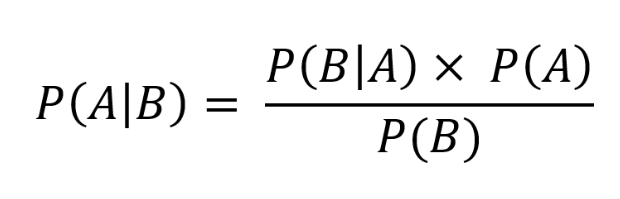

**Imagem 1: Teorema de Bayes.**

O teorema de Bayes é uma fórmula de probabilidade que calcula a possibilidade de um evento acontecer, com base em um conhecimento que pode estar relacionado ao evento.

1. P(A∣B) é a probabilidade de que o evento A ocorra dado que o evento B ocorreu.
2. P(B∣A) é a probabilidade de que o evento B ocorra dado que o evento A ocorreu.
3. P(A) é a probabilidade inicial de que o evento A ocorra.
4. P(B) é a probabilidade inicial de que o evento B ocorra.

#Usos do Naive Bayes e sua Importância para a Análise de Sentimentos

O algoritmo de classificação Naive Bayes é uma ferramenta importânte e versátil quando se trata de análise de sentimentos em textos. Sua aplicação é ampla e sua importância não pode ser subestimada no campo da análise de sentimentos. Neste texto, exploraremos os usos do Naive Bayes e sua importância para essa tarefa crucial.

O Naive Bayes é um algoritmo de aprendizado de máquina supervisionado que se baseia no Teorema de Bayes para realizar classificações. Sua simplicidade e eficácia o tornam uma escolha popular para a análise de sentimentos, que envolve a categorização de textos em positivos, negativos ou neutros. Aqui estão algumas maneiras pelas quais o Naive Bayes é usado nesse contexto:

1. Classificação de Textos em Redes Sociais: Com a explosão das mídias sociais, a análise de sentimentos se tornou fundamental para entender as opiniões e reações das pessoas. O Naive Bayes é frequentemente empregado para classificar os sentimentos expressos em tweets, posts de blogs e atualizações de status.

2. Avaliação de Comentários de Clientes: Empresas usam o Naive Bayes para analisar as opiniões dos clientes em avaliações de produtos ou serviços. Isso permite que as empresas identifiquem feedbacks negativos e positivos e tomem medidas para melhorar a qualidade de seus produtos e serviços.

3. Análise de Sentimentos em Análise de Mercado: O Naive Bayes também desempenha um papel importante na análise de mercado, onde ajuda a entender como as notícias e as opiniões dos consumidores afetam os mercados financeiros. Ele pode prever flutuações de preços com base em notícias e sentimentos do mercado.

Em resumo, o Naive Bayes desempenha um papel crucial na análise de sentimentos, permitindo que empresas, pesquisadores e profissionais tomem decisões informadas com base nas opiniões e reações do público. Sua simplicidade, velocidade e eficácia tornam-no uma escolha valiosa em um mundo cada vez mais voltado para a compreensão das emoções e opiniões expressas por meio do texto.

#Implementação

Importação das Bibliotecas, Remoção de Tags e Crregamento do DataFrame:

In [8]:
#Importação das Bibliotecas e Remoção das Tags:

import zipfile
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
import re


nome_arquivo_zip = 'archive.zip'

with zipfile.ZipFile(nome_arquivo_zip, 'r') as zip_ref:
    zip_ref.extractall()

dados = pd.read_csv('IMDB Dataset.csv')

removelist = ""

def remove_tags(string):
    resultado = re.sub('<.*?>', '', string)
    resultado = re.sub('https://.*', '', resultado)
    resultado = re.sub(r'[^a-zA-Z\s]', ' ', resultado)
    resultado = resultado.lower()
    return resultado

dados['review'] = dados['review'].apply(lambda cw: remove_tags(cw))

nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
dados['review'] = dados['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

#Tokenização do Texto e Cálculo de Ocorrência das Previsões:

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st

dados['review'] = dados['review'].apply(lemmatize_text)

reviews = dados['review'].values
labels = dados['sentiment'].values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify=encoded_labels, test_size=0.2, random_state=42)

vec = CountVectorizer(max_features=3000)
X = vec.fit_transform(train_sentences)
vocabulary = vec.get_feature_names_out()
X = X.toarray()
word_counts = {label: defaultdict(lambda: 0) for label in range(2)}

for i in range(X.shape[0]):
    label = train_labels[i]
    for j in range(len(vocabulary)):
        word_counts[label][vocabulary[j]] += X[i][j]

def calculate_log_likelihood(word_counts, label):
    total_words = sum(word_counts[label].values())
    log_likelihood = defaultdict(lambda: 0)
    for word in vocabulary:
        word_count = word_counts[label][word]
        log_likelihood[word] = math.log((word_count + 1) / (total_words + len(vocabulary)))
    return log_likelihood

def calculate_log_prior(train_labels, label):
    total_labels = len(train_labels)
    label_count = len([l for l in train_labels if l == label])
    log_prior = math.log(label_count / total_labels)
    return log_prior


log_priors = {label: calculate_log_prior(train_labels, label) for label in range(2)}
log_likelihoods = {label: calculate_log_likelihood(word_counts, label) for label in range(2)}

def predict(test_sentence):
    label_scores = {label: log_priors[label] for label in range(2)}
    words = test_sentence.split()
    for word in words:
        for label in range(2):
            if word in vocabulary:
                label_scores[label] += log_likelihoods[label][word]
    return max(label_scores, key=label_scores.get)

predictions = [predict(test_sentence) for test_sentence in test_sentences]

#Apresentação dos Resultados:

accuracy = accuracy_score(test_labels, predictions)
print("Acurácia no conjunto de teste: ", accuracy)

precision = precision_score(test_labels, predictions)
print("Precisão no conjunto de teste:", precision)

recall = recall_score(test_labels, predictions)
print("Revocação no conjunto de teste:", recall)

f1 = f1_score(test_labels, predictions)
print("Valor F1 no conjunto de teste:", f1)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Acurácia no conjunto de teste:  0.8464
Precisão no conjunto de teste: 0.8454327881930594
Revocação no conjunto de teste: 0.8478
Valor F1 no conjunto de teste: 0.8466147393648892
